# Laboratorio 3: Clustering

## Instrucciones

- Haz una copia de este notebook en `File -> Save a copy in Drive`.
- Al final de la sesión, descarga el notebook `File -> Download -> Download .ipynb` y súbelo en la sección Tareas de U-Cursos que se abrirá para esta sesión.]


## Preguntas prácticas

Utilizaremos un dataset de precios de viviendas usadas de la RM, las cuales fueron extraídas desde chilepropiedades.cl

Referencia: https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023

In [1]:
import pandas as pd
import numpy as np
dfr = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/diplomado/dataset/precios_casas.csv", sep=",")

dfr.head()


,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades


## Pregunta 1

Elimine todas las filas que tengan algún valor Nulo (NaN) en sus celdas. Luego muestre la cantidad de filas existente por cada comuna


In [2]:
#No es necesario hacerlo pero inspeccionaré el dataframe, para tener una idea previa de la cantidad de nulos
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7779 non-null   int64  
 1   Price_UF    7779 non-null   int64  
 2   Price_USD   7779 non-null   int64  
 3   Comuna      7779 non-null   object 
 4   Ubicacion   7779 non-null   object 
 5   Dorms       7779 non-null   int64  
 6   Baths       7714 non-null   float64
 7   Built Area  7533 non-null   float64
 8   Total Area  7571 non-null   float64
 9   Parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  Realtor     7184 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 729.4+ KB


In [3]:
#Las columnas que tienen datos nulos son "Baths", "Built Area", "Total Area", "Parking" y "Realtor".
#A continuación se eliminan los nulos:
dfr_new=dfr.dropna()

In [4]:
#A continuación, la cantidad de filas para cada comuna:
dfr_new.groupby(['Comuna'])['Comuna'].count().sort_values(ascending=False)

Comuna
PuenteAlto           496
LasCondes            468
Maipú                382
Colina               363
LoBarnechea          333
LaFlorida            295
Peñalolén            211
LaReina              180
Vitacura             175
SanBernardo          175
Ñuñoa                146
Quilicura            117
Lampa                109
Pudahuel              99
Huechuraba            97
Santiago              91
Providencia           88
Buin                  77
SanMiguel             63
Macul                 61
PadreHurtado          61
Peñaflor              54
EstaciónCentral       50
LaCisterna            49
ElBosque              45
Cerrillos             42
Talagante             37
Renca                 37
Recoleta              34
SanJoaquín            33
Conchalí              30
LaGranja              29
QuintaNormal          28
LaPintana             28
Melipilla             27
Paine                 26
PedroAguirreCerda     26
Independencia         25
LoPrado               25
CerroNavia        

## Pregunta 2

Queremos entender si en una comuna específica existen grupos de propiedades distintas de acuerdo a las características de estas. Para ello, seleccione alguna comuna que tenga más de 150 registros. Almacene el resultado en una variable.


In [5]:
#Seleccionaré a la comuna de Peñalolén, que tiene 211 registros
df_comuna=dfr_new.loc[dfr_new["Comuna"]=="Peñalolén"]
df_comuna

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
113,150000000,4215,186800,Peñalolén,Peñalolén,5,4.0,130.0,175.0,3.0,6211455,Difusion Propiedades
143,462670000,13000,576177,Peñalolén,AlvaroCasanova355,4,3.0,140.0,260.0,2.0,11011207,Samsara Propiedades y Asesorías
150,242012000,6800,301385,Peñalolén,AlbertoOrregoLuco,3,2.0,98.0,227.0,2.0,10916394,Lorraine Landon Propiedades
186,273000000,7671,339975,Peñalolén,LosJardineros,4,2.0,250.0,500.0,4.0,7742050,Helena de Troya
188,286499500,8050,356786,Peñalolén,ElOlivillo5956,5,3.0,131.0,241.0,1.0,5311878,Arévalo Propiedades
...,...,...,...,...,...,...,...,...,...,...,...,...
7237,1014315000,28500,1263157,Peñalolén,Elembalse,3,3.0,187.0,2800.0,4.0,9671571,Unne
7279,498260000,14000,620498,Peñalolén,LosRobles,4,2.0,132.0,424.0,2.0,7214806,Sucasa Gestión Inmobiliaria
7280,369602150,10385,460277,Peñalolén,Elsolar,5,4.0,163.0,350.0,4.0,8296257,Sucasa Gestión Inmobiliaria
7423,8450,0,11,Peñalolén,Penalolen,3,3.0,125.0,205.0,2.0,9755276,Sandra Propiedades


## Pregunta 3

Usando el dataframe obtenido anteriormente, filtre las columnas del dataset considerando solamente la cantidad de dormitorios, baños, área construida y área total. Almacene este dataframe en alguna variable distinta de la original.

In [6]:
#Se seleccionan las columnas asociadas a: cantidad de dormitorios, baños, área construida y área total.
df_comuna_new=df_comuna[["Dorms", "Baths", "Built Area", "Total Area"]]
df_comuna_new

,Dorms,Baths,Built Area,Total Area
113,5,4.0,130.0,175.0
143,4,3.0,140.0,260.0
150,3,2.0,98.0,227.0
186,4,2.0,250.0,500.0
188,5,3.0,131.0,241.0
...,...,...,...,...
7237,3,3.0,187.0,2800.0
7279,4,2.0,132.0,424.0
7280,5,4.0,163.0,350.0
7423,3,3.0,125.0,205.0


## Pregunta 4

Primero intentaremos encontrar la cantidad de grupos de propiedades usando K-Means. Ejecute el siguiente código:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

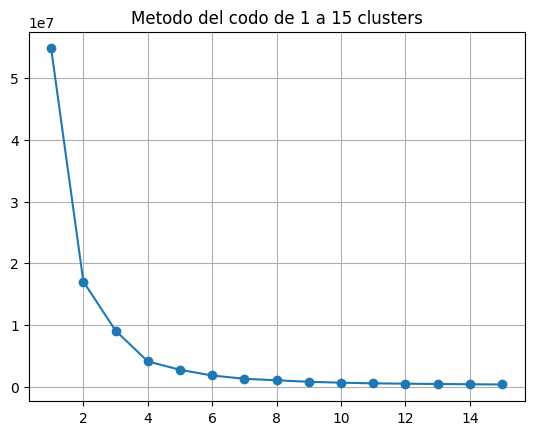

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state = 10).fit(df_comuna_new)  #reemplace df con el dataframe obtenido en la pregunta 4
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

**1.** ¿Cuántos clusters propone usar para este dataset? Justifique su elección.

Propongo usar 4 clústers, de acuerdo al método del codo, pues se observa que en ese valor se produce el punto de inflexión.

**2.** Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato. Adicionalmente, muestre el tamaño de cada uno de los clusters ¿Qué observaciones podría mencionar acerca de la cantidad de datos por cluster?

In [8]:
random_state = 20
#Se escoge el valor mencionado anteriormente para n_clusters
kmeans = KMeans(n_clusters=4, n_init=40, max_iter=500, random_state=random_state)
kmeans.fit(df_comuna_new)
y_pred = kmeans.predict(df_comuna_new)
#Asignaciones de clusters para cada dato:
y_pred

array([0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       3, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0,
       3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 1, 0, 3, 0, 0, 0,
       0, 3, 0, 3, 3, 3, 1, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 1, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 1, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0], dtype=int32)

In [9]:
#El tamaño de cada uno de los clusters
counts = np.bincount(y_pred)
print(counts)

[147   7   2  55]


La cantidad de datos por cluster no es similar. Se observan dos clusters grandes, con 147 y 55 datos, y dos clusters pequeños, con 7 y 2 datos. Los grupos pequeños podrían corresponder a outliers.

## Pregunta 5

Reduzca la dimensionalidad de los datos a 2 y grafique los datos transformados pintando los datos para tener una representación visual de los clusters ¿Qué observación se puede desprender del gráfico?

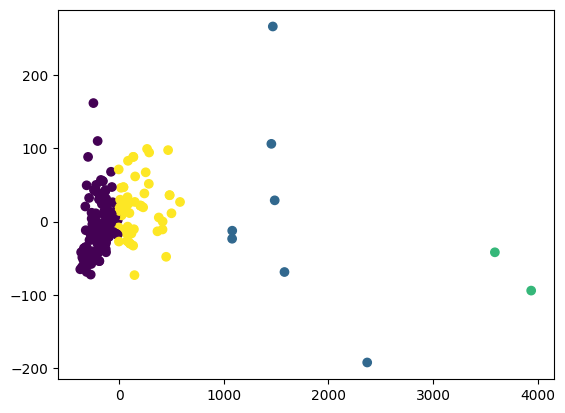

In [11]:
from sklearn.decomposition import PCA
reduX = PCA(n_components=2, random_state=0).fit_transform(df_comuna_new)
plt.scatter(reduX[:, 0], reduX[:, 1], c=kmeans.labels_)
plt.show()

- Visualmente, los clusters son fácilmente identificables.
- En particular, los dos datos de la derecha podrían identificarse como outliers, pues se diferencian considerablemente del resto.
- Los clusters morados y amarillos son bien densos, mientras que el azul es mucho más disperso.

## Pregunta 6

Escale los datos con `MinMaxScaler` y repita el proceso de encontrar el `k` óptimo. Replique el mismo proceso elaborado anteriormente en la pregunta 3. Es decir, buscar el mejor `k` con el método del codo, contar la cantidad de datos por grupos y visualizar. Comente al respecto.



In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_comuna_new)
scaled = scaler.transform(df_comuna_new)
scaled_df = pd.DataFrame(scaled, columns=df_comuna_new.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

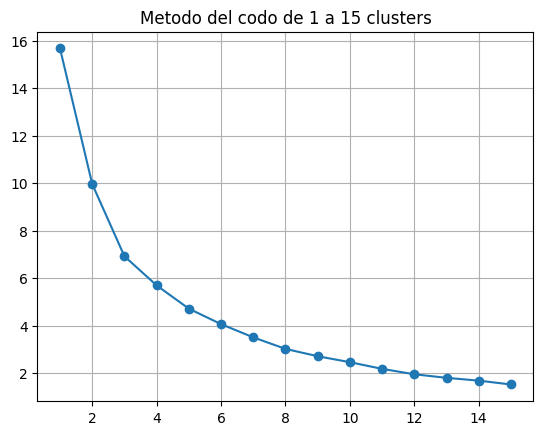

In [14]:
sse_scaled = []

clusters = list(range(1, 16)) #range(1,41)
for k in clusters:
    kmeans_scaled = KMeans(n_clusters=k).fit(scaled_df)
    sse_scaled.append(kmeans_scaled.inertia_)

plt.plot(clusters, sse_scaled, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

- En este caso, no es tan directo identificar "el codo" de este gráfico.
- Para seleccionar un valor para k, utilizaré un while y escogeré el que tenga el mayor coeficiente de silhouette.

In [16]:
from sklearn.metrics import silhouette_score
random_state = 20
k=2
while k < 7:
  kmeans_scaled = KMeans(n_clusters=k, n_init=20, max_iter=300, random_state=random_state)
  kmeans_scaled.fit(scaled_df)
  y_pred = kmeans_scaled.predict(scaled_df)
  print("Kmeans silhouette para k=",str(k), silhouette_score(scaled_df, kmeans_scaled.labels_))
  k=k+1

Kmeans silhouette para k= 2 0.3777868322803013
Kmeans silhouette para k= 3 0.38663909346578873
Kmeans silhouette para k= 4 0.30801028533399205
Kmeans silhouette para k= 5 0.33454487154298357
Kmeans silhouette para k= 6 0.3192533703991057


In [17]:
#En base a lo anterior, se selecciona k=3.

In [18]:
random_state = 20
kmeans_scaled = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=random_state)
kmeans_scaled.fit(scaled_df)
y_pred = kmeans_scaled.predict(scaled_df)
counts = np.bincount(y_pred)
print(counts)

[ 97   3 111]


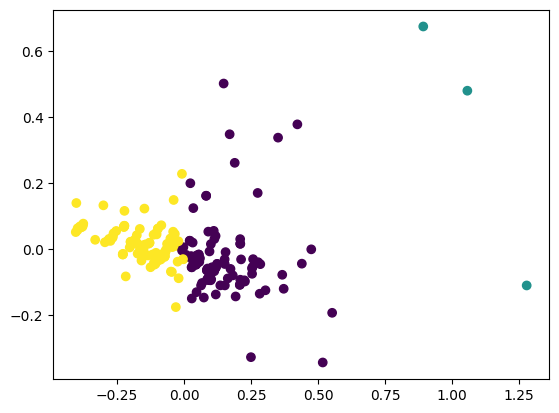

In [19]:
reduX = PCA(n_components=2, random_state=0).fit_transform(scaled_df)
plt.scatter(reduX[:, 0], reduX[:, 1], c=kmeans_scaled.labels_)
plt.show()

- Se observan los 3 clusters claramente.
    - El cluster amarillo tiene datos bien concentrados.
    - El cluster morado es más disperso que el amarillo.
    - El cluster verde, que tiene 3 datos podrían ser outliers.

- Además se observa que hay algunos datos morados que están más cerca del clúster amarillo, es decir, hacia la isquierda de lo que se espera.

## Pregunta 7

Evalue la calidad de los 2 mejores métodos de clustering obtenidos previamente para datos con y sin escalar. Para ello muestre el coeficiente de silhouette promedio. Adicionalmente, visualice el coeficiente de silhouette para todos los datos. Mencione alguna observación que se desprende de este gráfico.

In [21]:
#Se importa la métrica
from sklearn.metrics import silhouette_score
#Sin escalar
print("Kmeans silhouette", silhouette_score(df_comuna_new, kmeans.labels_))

Kmeans silhouette 0.5911889169765085


In [22]:
#Con escalado
print("Kmeans silhouette", silhouette_score(scaled_df, kmeans_scaled.labels_))

Kmeans silhouette 0.38663909346578873


In [23]:
#Para todos los datos
from sklearn.metrics import silhouette_samples

In [24]:
def plot_silhouette(dataset, model):
    use_indices = model.labels_ >= 0
    use_labels = model.labels_[use_indices]
    use_data = dataset.iloc[use_indices]

    n_clusters = len(np.unique(use_labels))


    fig, ax1 = plt.subplots()

    silhouette_avg = silhouette_score(use_data, use_labels)
    print(f"The average silhouette_score for {model.__class__.__name__} is : {silhouette_avg}")
    sample_silhouette_values = silhouette_samples(use_data, use_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[use_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"{model.__class__.__name__}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])

The average silhouette_score for KMeans is : 0.5911889169765085


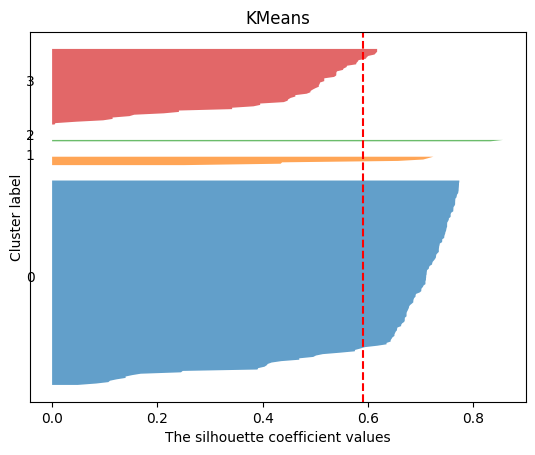

In [25]:
plot_silhouette(df_comuna_new, kmeans)

The average silhouette_score for KMeans is : 0.38663909346578873


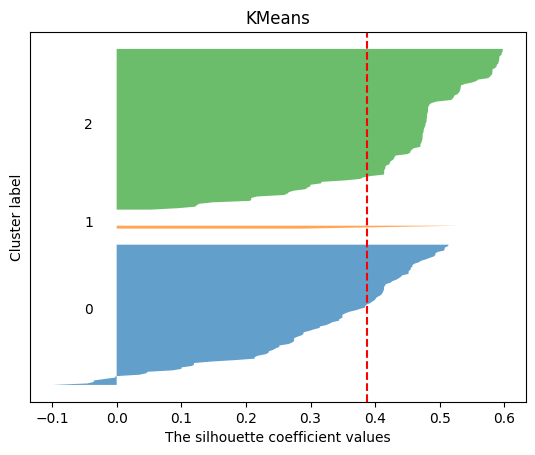

In [26]:
plot_silhouette(scaled_df, kmeans_scaled)

Se observa que en el gráfico de los datos escalados (él último), el cluster 0 (azul) presenta valores negativos, lo que indica que algunos datos son más cercanos al centroide de otro cluster. Esto coincide con lo anteriormente observado en el gráfico con reducción de dimensionalidad.

## Pregunta 8

Considerando el método de clustering con mejor rendimiento según el coeficiente de silhouette, agregue la asignación de los clusters al dataset que utilizó como una nueva columna.

Describa cada cluster obtenido analizando las estadísticas agregadas de las propiedades. Por ejemplo, observe el promedio de cada grupo, desviación estándar, etc. *Hint:* puede utilizar la función `df.describe`.

Comente 2 observaciones que puede concluir acerca de los grupos obtenidos.

In [28]:
#El mejor modelo es sin escalado:
random_state = 20
kmeans = KMeans(n_clusters=4, n_init=20, max_iter=500, random_state=random_state)
kmeans.fit(df_comuna_new)
y_pred = kmeans.predict(df_comuna_new)

In [29]:
df_comuna_new["Cluster"]=y_pred

<ipython-input-29-fb3487624c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comuna_new["Cluster"]=y_pred


In [30]:
#Dormitorios
df_comuna_new.groupby(['Cluster'])["Dorms"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,147.0,4.074830,1.079627,2.0,3.0,4.0,5.0,9.0
1,7.0,5.000000,3.162278,3.0,3.5,4.0,4.5,12.0
2,2.0,6.000000,1.414214,5.0,5.5,6.0,6.5,7.0
3,55.0,4.745455,0.907136,3.0,4.0,5.0,5.0,8.0


In [31]:
#Baños
df_comuna_new.groupby(['Cluster'])["Baths"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,147.0,2.870748,0.967075,1.0,2.00,3.0,4.00,6.0
1,7.0,4.285714,1.704336,3.0,3.50,4.0,4.00,8.0
2,2.0,6.500000,0.707107,6.0,6.25,6.5,6.75,7.0
3,55.0,4.145455,0.989167,2.0,4.00,4.0,5.00,6.0


In [32]:
#Superficie construida
df_comuna_new.groupby(['Cluster'])["Built Area"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,147.0,135.183673,38.641312,60.0,110.0,139.0,160.0,298.0
1,7.0,313.428571,129.857431,187.0,236.5,247.0,363.0,561.0
2,2.0,440.000000,14.142136,430.0,435.0,440.0,445.0,450.0
3,55.0,193.800000,42.649910,100.0,161.0,190.0,218.5,300.0


In [33]:
#Superficie total
df_comuna_new.groupby(['Cluster'])["Total Area"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,147.0,238.925170,88.177132,60.0,175.5,240.0,300.0,410.0
1,7.0,1917.571429,436.150531,1500.0,1680.0,1861.0,1951.0,2800.0
2,2.0,4175.000000,247.487373,4000.0,4087.5,4175.0,4262.5,4350.0
3,55.0,587.363636,157.705699,413.0,474.5,530.0,665.0,1000.0


- El clúster más pequeño (el clúster 2, con dos datos) tiene mayor promedio en todos los atributos.
- Le sigue el segundo clúster más pequeño (el cluster 1, con 7 datos), también superando a los demás.
- A continuación sigue el cluster 3 (con 55 datos) y finalmente el cluster 0 (con 147 datos).
- De esto se puede concluir que los cluster 2 y 3 corresponden a propiedades grandes.
- Mientras que los cluster 0 y 3 a propiedades más pequeñas.
- Esta relación "directa" entre todos los atributos es "esperable", pues a mayor superficie de construcción, se puede construir una casa más grande, y mientras más grande la casa, mayor el número de habitaciones y baños.
- La mayor varianza en todos los atributos, la muestra el cluster 1, de lo que se puede concluir que existe una gran diversidad de propiedades en este grupo. Lo que coincide con el gráfico con reducción de dimensionalidad donde los datos de este cluster (los datos azules) se observan muy dispersos.